Day 72: Programming Language Popularity Over Time (Data Visualization)

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv')
df = df.rename(columns={'m':'DATE', 'TagName':'TAG', 'Unnamed: 2':'POSTS'})

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,DATE,TAG,POSTS
2295,2022-05-01 00:00:00,php,4173
2296,2022-05-01 00:00:00,python,23813
2297,2022-05-01 00:00:00,r,4916
2298,2022-05-01 00:00:00,ruby,506
2299,2022-05-01 00:00:00,swift,1804


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
print(f'Rows: {len(df)}')
print(f'Columns: {len(df.columns)}')

Rows: 2300
Columns: 3


**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
for col in df.columns:
    rows = len(df[col][df[col].notnull()])
    print(f'There are {rows} non-empty entries in {col}')

There are 2300 non-empty entries in DATE
There are 2300 non-empty entries in TAG
There are 2300 non-empty entries in POSTS


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df_lang = df.groupby('TAG').sum()
df_lang.sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2375506
python,1951262
java,1844695
c#,1538436
php,1434649
c++,765028
r,449639
c,379749
swift,312886


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df_date = df.groupby('TAG').count()
df_date = df_date[['DATE']]
df_date.sort_values('DATE', ascending=False)

,DATE
TAG,
c#,167
assembly,166
c,166
c++,166
delphi,166
java,166
javascript,166
perl,166
php,166


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
cleaned_df = df.copy()
cleaned_df['DATE'] = pd.to_datetime(cleaned_df['DATE'])
cleaned_df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



In [10]:
reshaped_df = cleaned_df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [11]:
len(reshaped_df)

167

In [12]:
len(reshaped_df.columns)

14

In [13]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1648.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1151.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,502.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [14]:
for col in reshaped_df.columns:
    rows = len(reshaped_df[col][reshaped_df[col].notna()])
    print(f'{col} entries: {rows}')

assembly entries: 166
c entries: 166
c# entries: 167
c++ entries: 166
delphi entries: 166
go entries: 151
java entries: 166
javascript entries: 166
perl entries: 166
php entries: 166
python entries: 166
r entries: 164
ruby entries: 166
swift entries: 158


In [15]:
filled_df = reshaped_df.fillna(0)

In [16]:
filled_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [17]:
import matplotlib.pyplot as plt

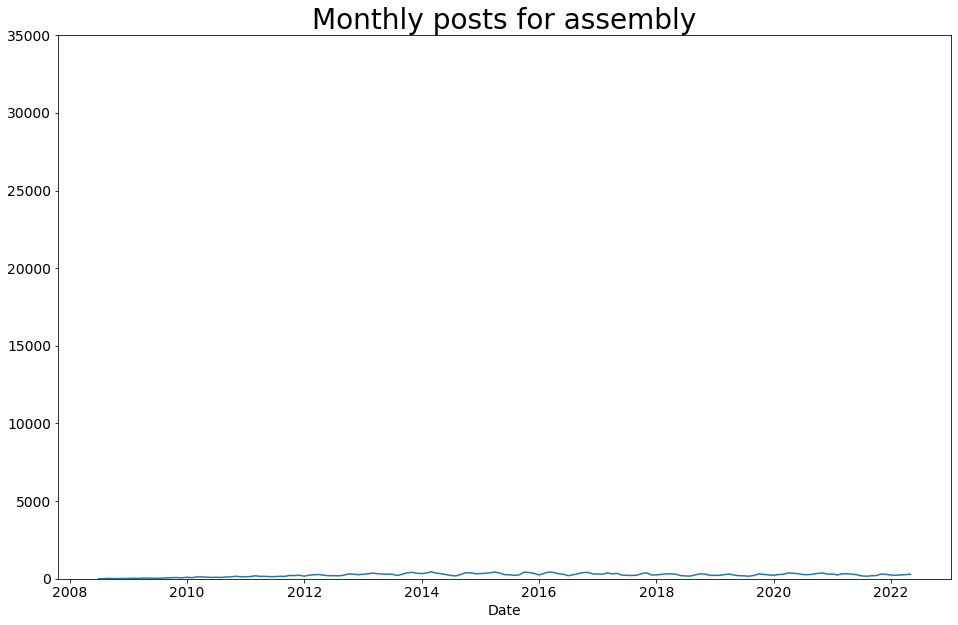

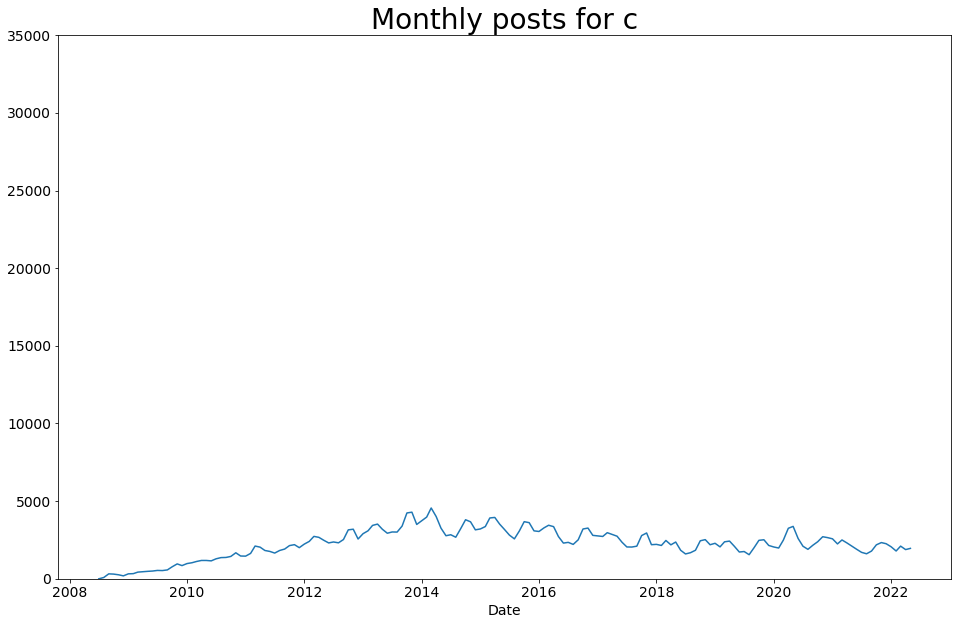

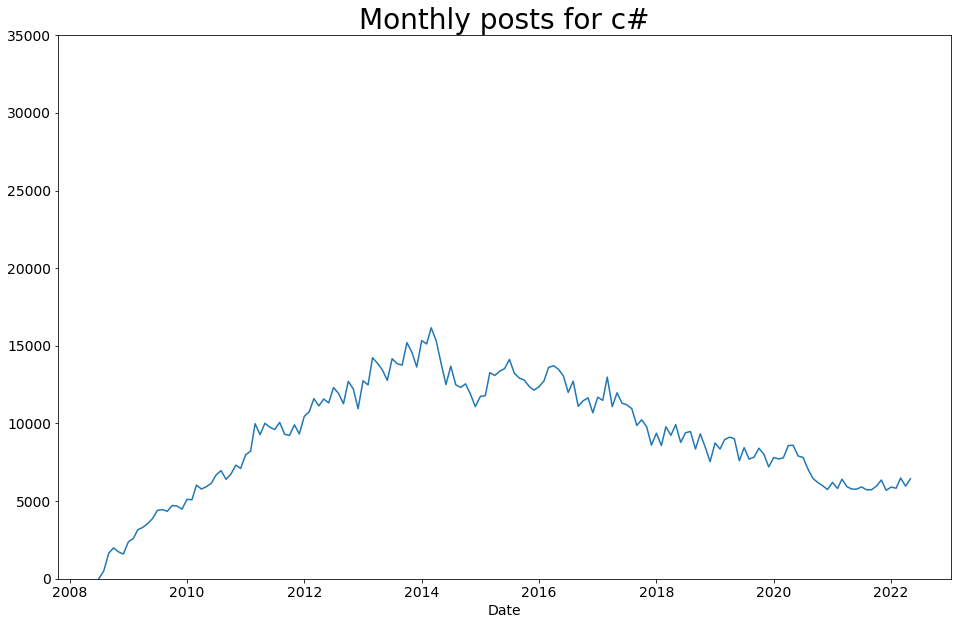

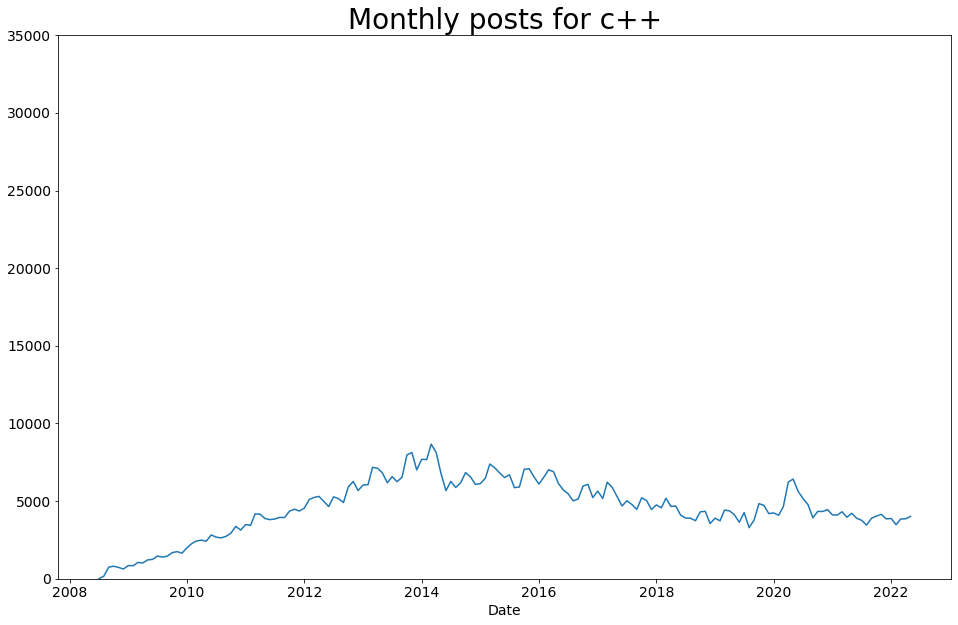

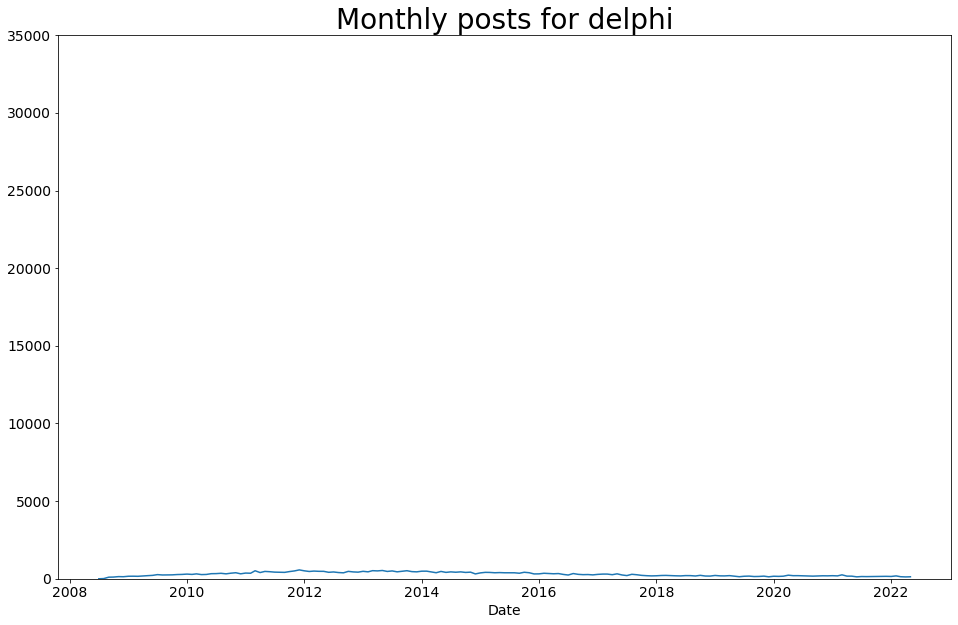

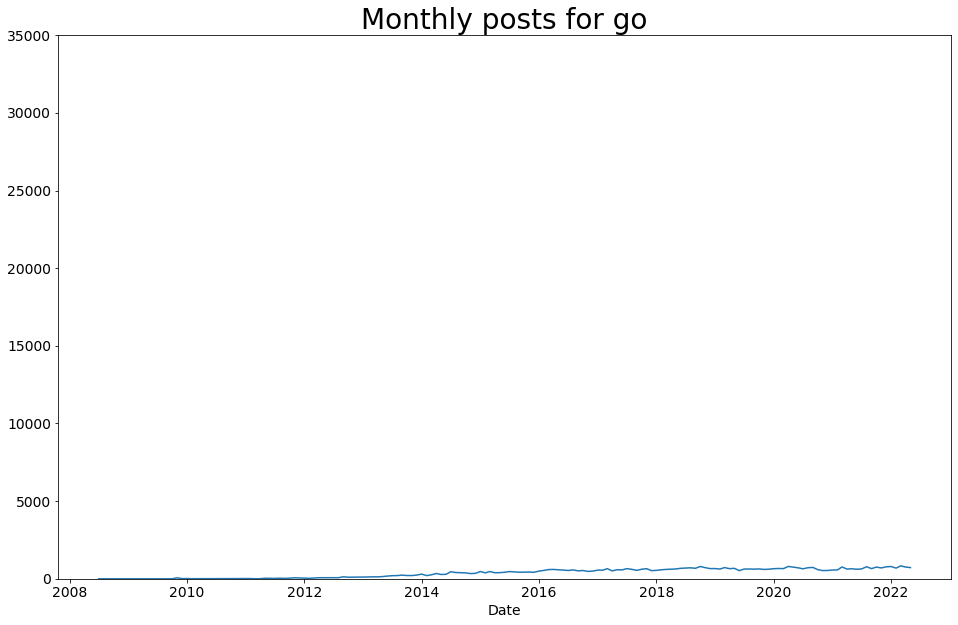

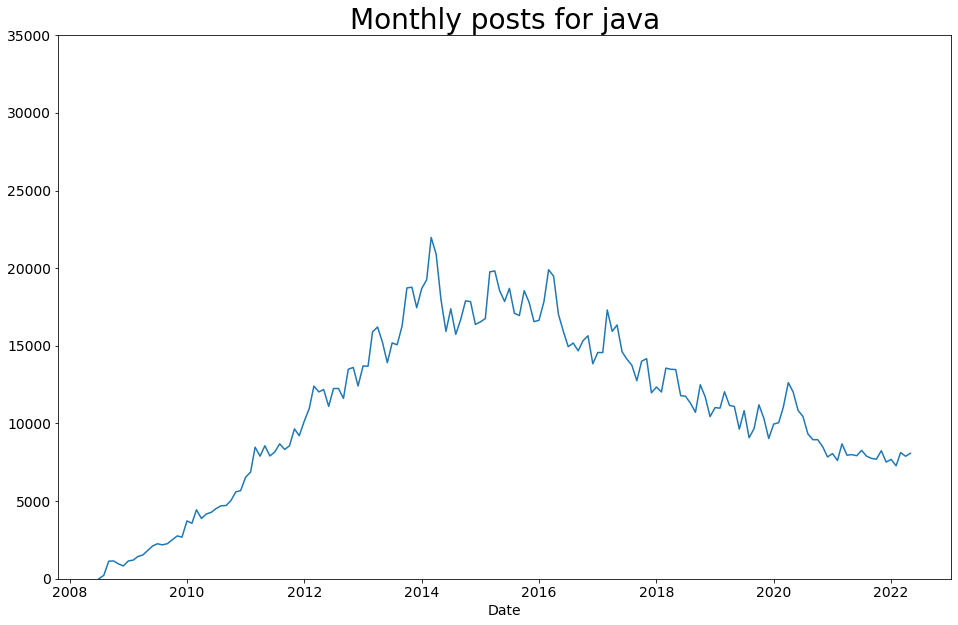

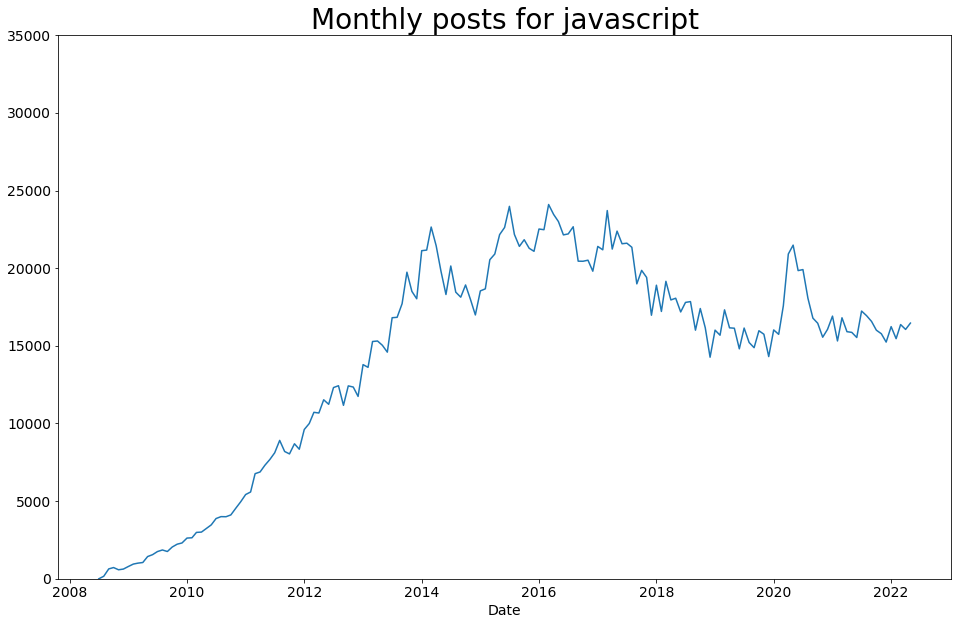

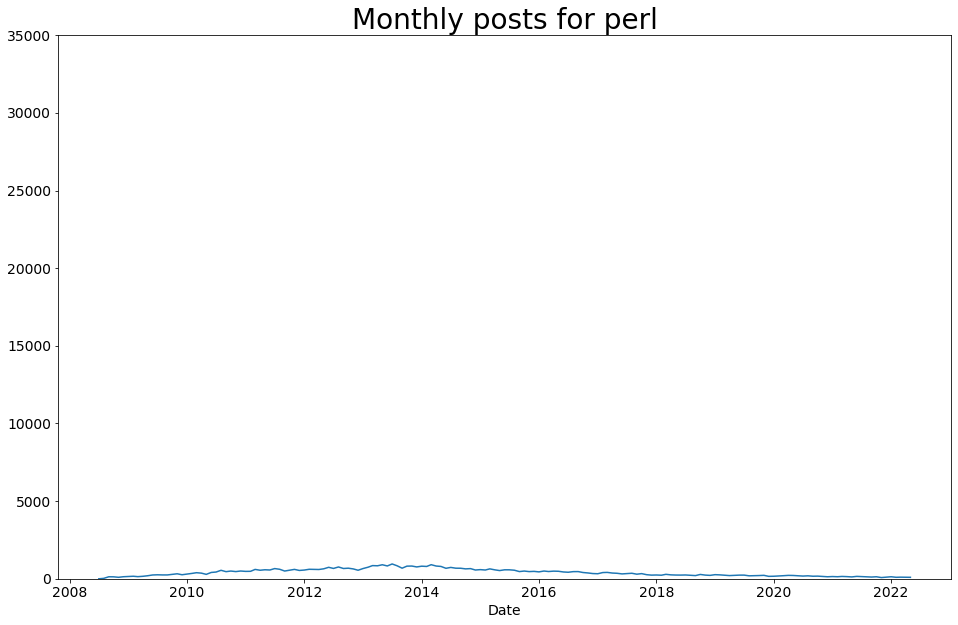

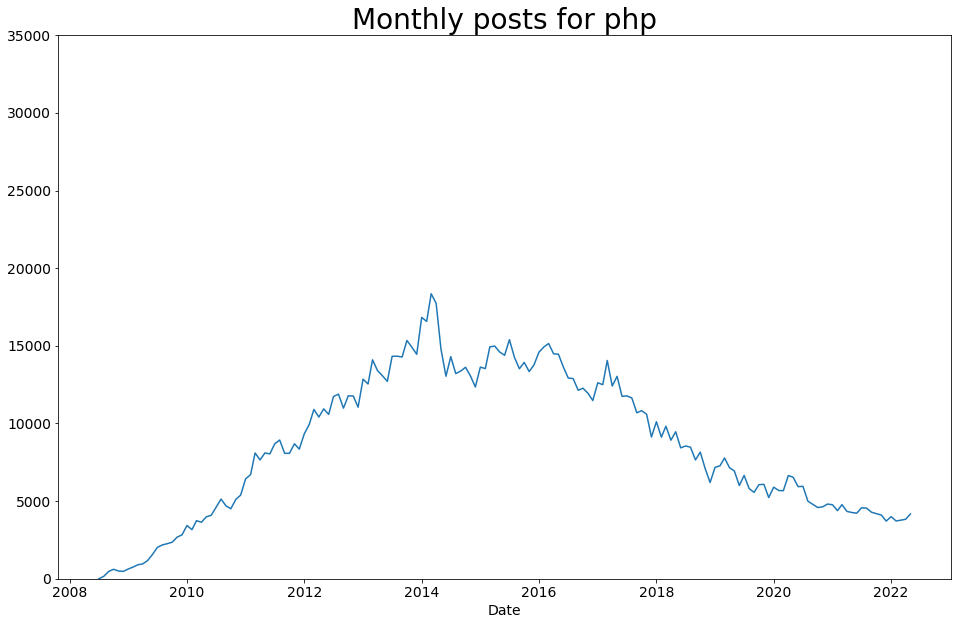

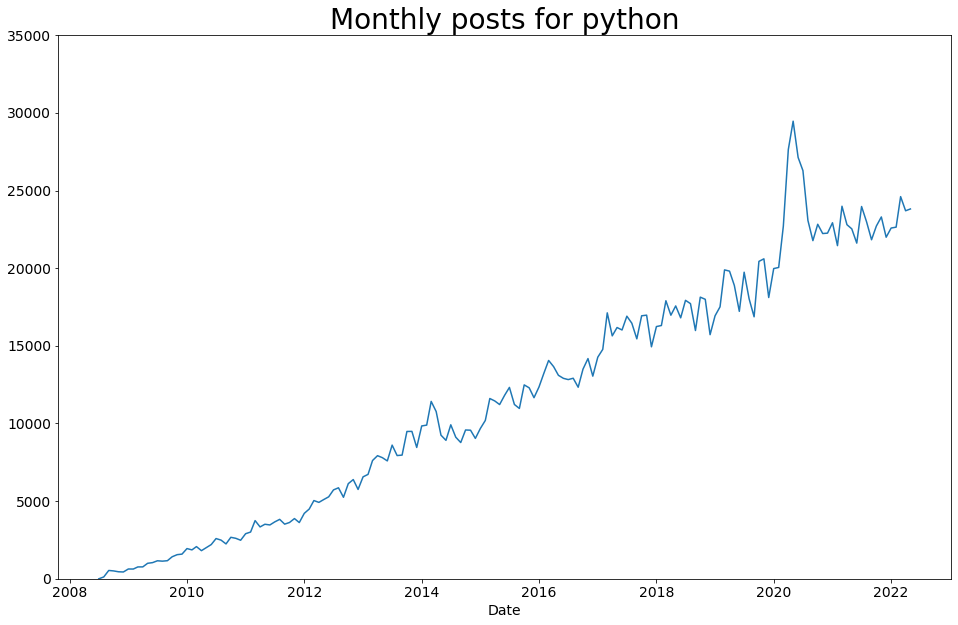

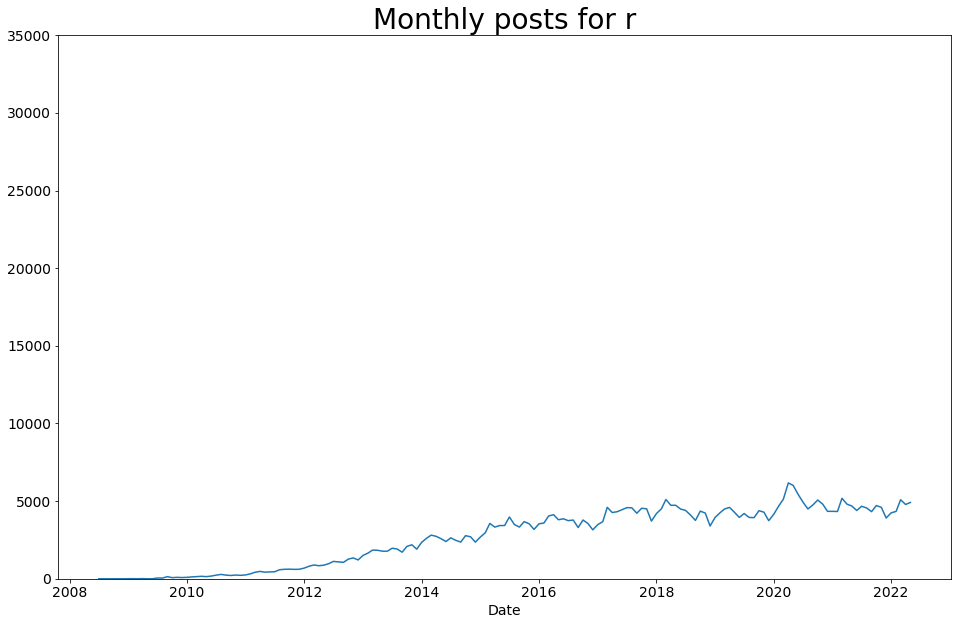

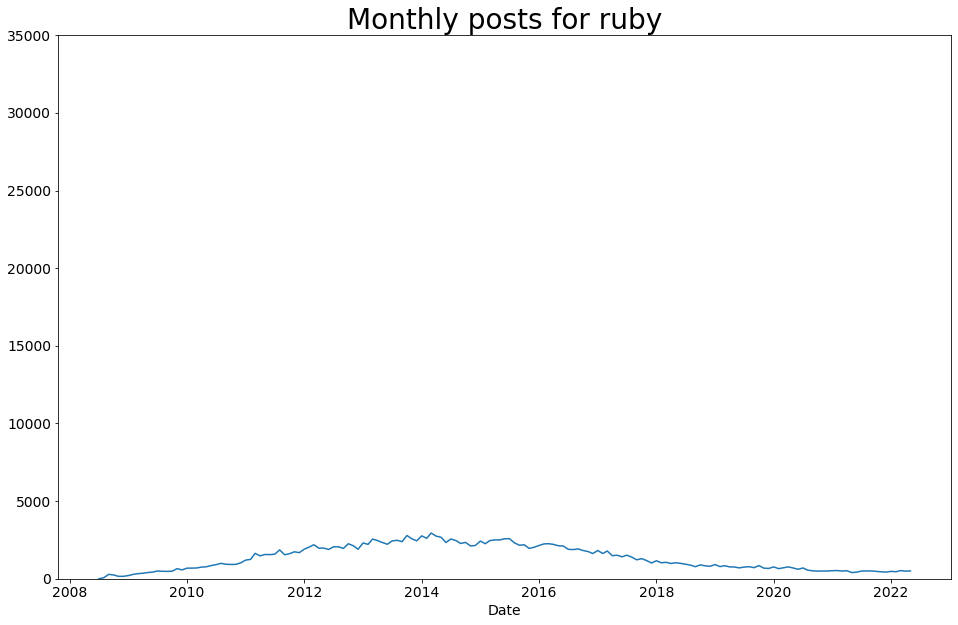

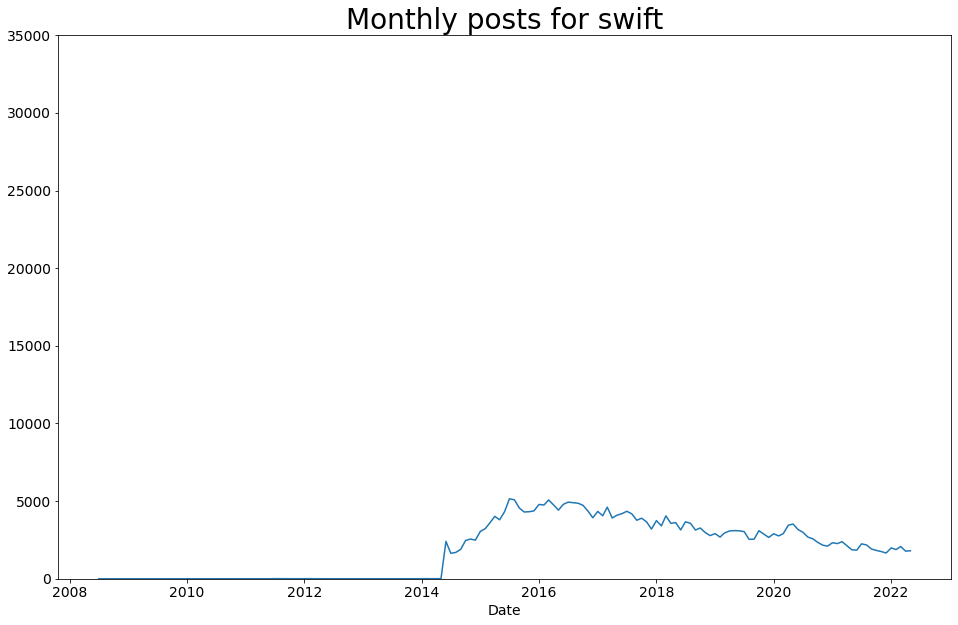

In [18]:
for col in filled_df.columns:

    plt.figure(figsize=(16, 10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.xlabel('Date', fontsize=14)
    plt.title(f'Monthly posts for {col}', fontsize=28)
    plt.ylim(0,35000)

    plt.plot(filled_df[col])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

<AxesSubplot:title={'center':'Monthly posts for java (orange) & python (green)'}, xlabel='DATE'>

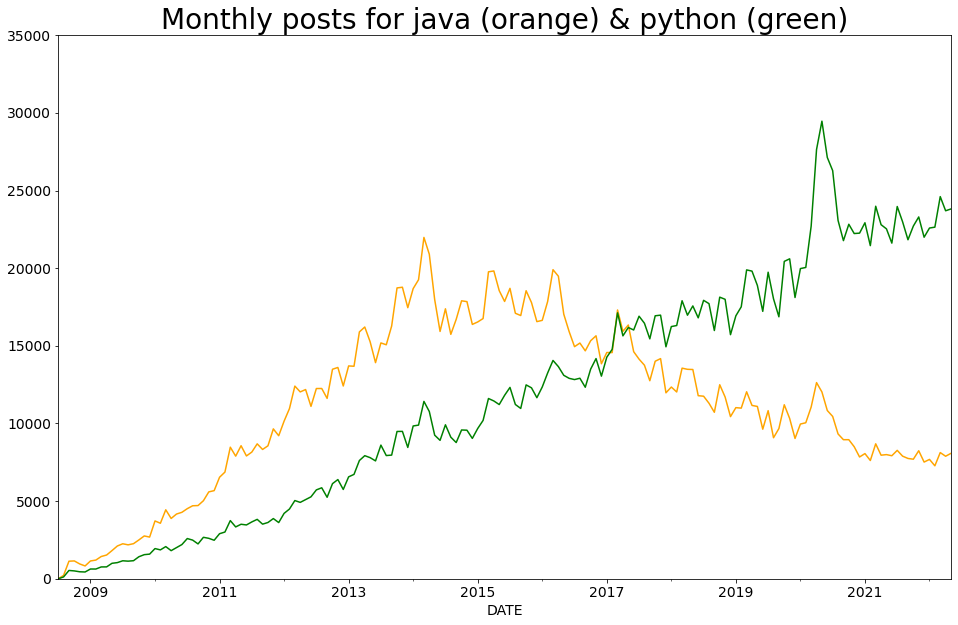

In [19]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Date', fontsize=14)
plt.title(f'Monthly posts for java (orange) & python (green)', fontsize=28)
plt.ylim(0,35000)

filled_df['java'].plot(color='orange')
filled_df['python'].plot(color='green')

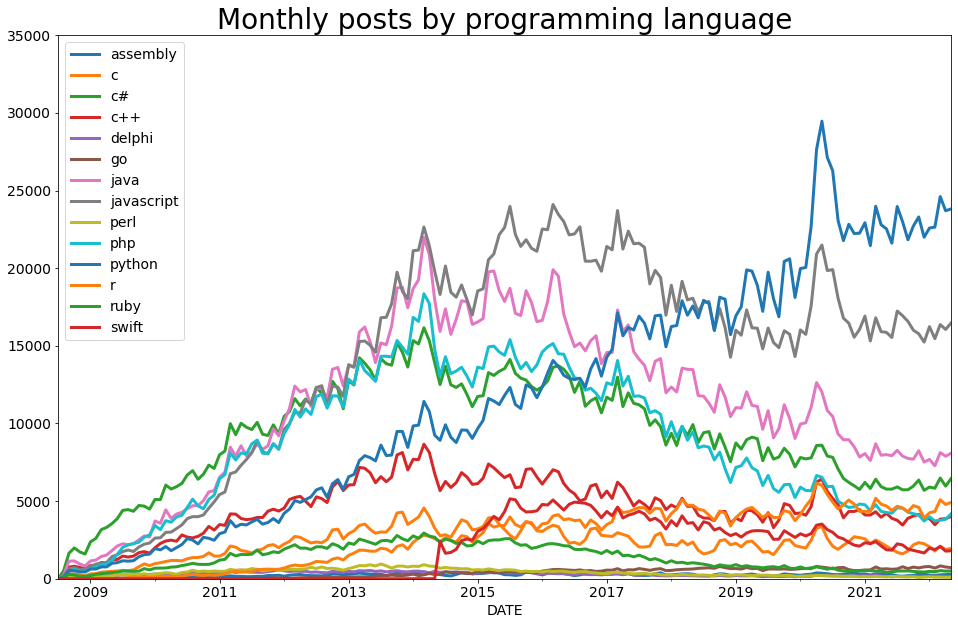

In [20]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Date', fontsize=14)
plt.title(f'Monthly posts by programming language', fontsize=28)
plt.ylim(0,35000)

for col in filled_df.columns:
    filled_df[col].plot(linewidth=3)

plt.legend(fontsize=14)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [21]:
roll_df = filled_df.rolling(window=6).mean()

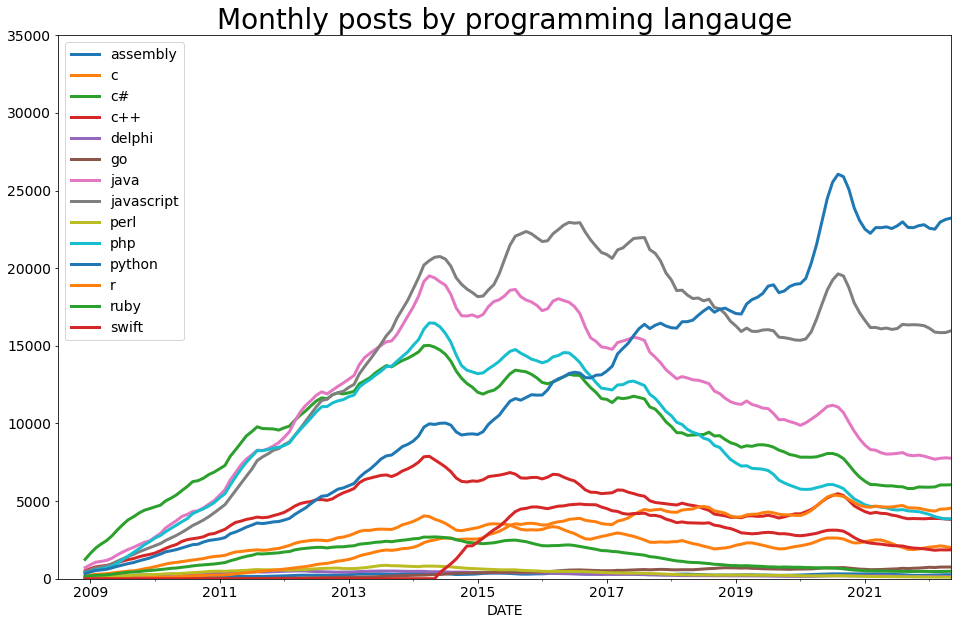

In [22]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Date', fontsize=14)
plt.title(f'Monthly posts by programming langauge', fontsize=28)
plt.ylim(0,35000)

for col in roll_df.columns:
    roll_df[col].plot(linewidth=3)

plt.legend(fontsize=14)